In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as ply

In [2]:
demograh_data = pd.read_csv("data/demographics.csv")
transactions = pd.read_csv("data/transactions.csv")
telco_data = pd.read_csv("data/telco.csv")
repayment_history = pd.read_csv("data/repayment_history.csv")

In [3]:
demograh_data.shape, transactions.shape, telco_data.shape, repayment_history.shape

((10000, 8), (68000, 5), (33000, 5), (18350, 6))

# Data Cleaning

## Demographics data

In [4]:
demograh_data.head()

,customer_id,age,gender,location,profession,is_rural,credit_score,high_activity
0,ID_0,34.0,Male,South Dakota,Trader,True,442,True
1,ID_1,22.0,Male,Delaware,Engineer,True,619,False
2,ID_2,32.0,Male,Alaska,Engineer,True,389,True
3,ID_3,19.0,Male,West Virginia,Teacher,False,419,False
4,ID_4,46.0,Male,Louisiana,Farmer,True,626,True


In [5]:
# drop credit_score and high_activity columns
demograh_data.drop(['credit_score', 'high_activity'], axis=1, inplace=True)

In [6]:
demograh_data.sample(5)

,customer_id,age,gender,location,profession,is_rural
6223,ID_6223,29.0,Female,Rhode Island,Trader,True
9054,ID_9054,33.0,Female,Texas,Trader,True
6829,ID_6829,38.0,Female,Iowa,Trader,True
1376,ID_1376,38.0,Female,New York,Trader,False
8657,ID_8657,49.0,Female,Tennessee,Farmer,False


In [7]:
demograh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  object 
 1   age          9260 non-null   float64
 2   gender       10000 non-null  object 
 3   location     10000 non-null  object 
 4   profession   9500 non-null   object 
 5   is_rural     10000 non-null  bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 400.5+ KB


In [8]:
demograh_data.isna().sum()

customer_id      0
age            740
gender           0
location         0
profession     500
is_rural         0
dtype: int64

In [9]:
# handle profession
demograh_data.profession.value_counts()

profession
Trader               3017
Farmer               3011
Teacher              1833
Engineer             1334
Healthcare Worker     305
Name: count, dtype: int64

In [10]:
demograh_data[demograh_data.profession.isna()]

,customer_id,age,gender,location,profession,is_rural
10,ID_10,52.0,Male,Utah,NaN,True
21,ID_21,37.0,Female,North Carolina,NaN,False
52,ID_52,30.0,Male,Rhode Island,NaN,True
82,ID_82,60.0,Male,Mississippi,NaN,True
91,ID_91,20.0,Female,Tennessee,NaN,True
...,...,...,...,...,...,...
9915,ID_9915,31.0,Male,New York,NaN,True
9922,ID_9922,20.0,Female,Arkansas,NaN,False
9927,ID_9927,NaN,Female,South Carolina,NaN,False
9939,ID_9939,31.0,Male,New Mexico,NaN,False


With 500 missing rows, we would create a new variable called "missing" for users without profession.

In [11]:
demograh_data.profession.loc[demograh_data.profession.isna()] = "missing"
demograh_data.profession = demograh_data.profession.apply(lambda x: x.lower())

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_87790/960610229.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  demograh_data.profession.loc[demograh_data.profession.isna()] = "missing"
/var/folders/yd/36hqj6y53ks959xgzn2k7htw

In [12]:
demograh_data.sample(5)

,customer_id,age,gender,location,profession,is_rural
3074,ID_3074,57.0,Male,Florida,teacher,True
6882,ID_6882,57.0,Female,South Carolina,farmer,True
6497,ID_6497,51.0,Male,Kansas,farmer,True
2253,ID_2253,NaN,Male,Texas,engineer,False
6269,ID_6269,24.0,Male,Rhode Island,missing,True


In [13]:
demograh_data.gender.value_counts()

gender
Female    5013
Male      4987
Name: count, dtype: int64

In [14]:
loca_val_counts = pd.DataFrame(demograh_data.location.value_counts())
loca_val_counts

,count
location,
Vermont,226
Oregon,225
Utah,223
Wyoming,219
Oklahoma,216
Florida,216
Tennessee,216
Ohio,214
Colorado,214


In [15]:
demograh_data.location = demograh_data.location.apply(lambda x: x.lower())

In [16]:
demograh_data.location.value_counts()

location
vermont           226
oregon            225
utah              223
wyoming           219
oklahoma          216
florida           216
tennessee         216
ohio              214
colorado          214
massachusetts     213
missouri          213
texas             212
south dakota      208
new york          208
new hampshire     208
new mexico        208
maryland          207
new jersey        207
connecticut       206
georgia           204
south carolina    202
mississippi       201
maine             201
washington        201
west virginia     201
nebraska          201
california        200
arizona           200
wisconsin         199
kansas            198
delaware          196
idaho             195
north dakota      194
rhode island      194
arkansas          194
iowa              193
louisiana         192
michigan          190
minnesota         189
hawaii            189
pennsylvania      189
montana           188
virginia          187
north carolina    183
illinois          183
k

In [17]:
demograh_data.is_rural.value_counts()

is_rural
False    5019
True     4981
Name: count, dtype: int64

In [18]:
demograh_data.gender = demograh_data.gender.apply(lambda x: x.lower())
demograh_data.is_rural = demograh_data.is_rural.astype(int)

In [19]:
demograh_data.sample(10)

,customer_id,age,gender,location,profession,is_rural
7908,ID_7908,56.0,male,south carolina,farmer,0
2520,ID_2520,48.0,female,texas,teacher,1
1974,ID_1974,26.0,female,west virginia,trader,1
6937,ID_6937,40.0,female,colorado,teacher,0
1561,ID_1561,51.0,female,utah,farmer,1
4931,ID_4931,57.0,male,maryland,farmer,0
7294,ID_7294,33.0,female,colorado,farmer,0
8054,ID_8054,32.0,male,west virginia,missing,0
8097,ID_8097,59.0,female,south carolina,farmer,1
3993,ID_3993,48.0,male,utah,farmer,0


In [20]:
demograh_data.describe()

,age,is_rural
count,9260.00000,10000.000000
mean,38.90054,0.498100
std,12.54418,0.500021
min,18.00000,0.000000
25%,28.00000,0.000000
50%,39.00000,0.000000
75%,50.00000,1.000000
max,60.00000,1.000000


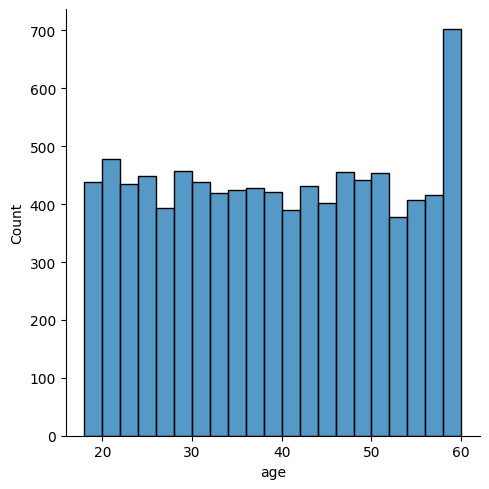

In [21]:
sns.displot(demograh_data.age)

Distribution plot shows that all ages have similar count and we do not have outliers in the data. Replace missing values with the mean age.

In [22]:
demograh_data.age.fillna(int(demograh_data.age.mean()), inplace=True)

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_87790/3340031600.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demograh_data.age.fillna(int(demograh_data.age.mean()), inplace=True)


In [23]:
demograh_data.isna().sum()

customer_id    0
age            0
gender         0
location       0
profession     0
is_rural       0
dtype: int64

In [24]:
demograh_data.to_csv("data/demographics_cleaned.csv")

## Transactions data

In [25]:
transactions.head()

,transaction_id,customer_id,timestamp,amount,transaction_type
0,TX_0,ID_8915,2023-10-13 18:54:46,174177.09,Deposit
1,TX_1,ID_6424,2023-07-14 19:26:13,102255.66,Purchase
2,TX_2,ID_876,2023-04-10 18:05:07,238792.30,Purchase
3,TX_3,ID_1398,2023-04-07 18:12:50,233231.78,Deposit
4,TX_4,ID_2116,2023-01-26 19:23:26,202310.96,Withdrawal


In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68000 entries, 0 to 67999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    68000 non-null  object 
 1   customer_id       68000 non-null  object 
 2   timestamp         68000 non-null  object 
 3   amount            64444 non-null  float64
 4   transaction_type  68000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.6+ MB


In [27]:
transactions.isna().sum()

transaction_id         0
customer_id            0
timestamp              0
amount              3556
transaction_type       0
dtype: int64

In [28]:
# handle timestamp
transactions.timestamp = pd.to_datetime(transactions.timestamp)

transactions.timestamp.min(), transactions.timestamp.max()

(Timestamp('2023-01-01 00:00:26'), Timestamp('2023-12-31 23:51:52'))

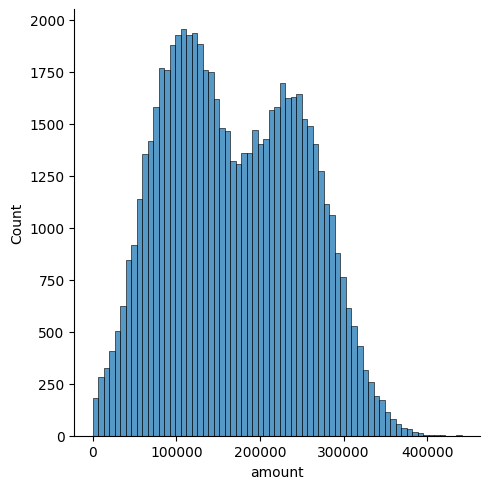

In [29]:
# handle amount
sns.displot(transactions.amount)

In [30]:
# handle missing value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder

imp_data = transactions[['amount', 'transaction_type']]
imp_data.transaction_type = LabelEncoder().fit_transform(imp_data.transaction_type)

amount_imputer = KNNImputer(n_neighbors=2, weights="uniform")
amount_imputer_ii = IterativeImputer(max_iter=10, random_state=0)

amount_imputer.fit(imp_data)
transactions["imputed_amount"] = amount_imputer.transform(imp_data)[:, 0]

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_87790/3073539218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_data.transaction_type = LabelEncoder().fit_transform(imp_data.transaction_type)


In [31]:
transactions.head()

,transaction_id,customer_id,timestamp,amount,transaction_type,imputed_amount
0,TX_0,ID_8915,2023-10-13 18:54:46,174177.09,Deposit,174177.09
1,TX_1,ID_6424,2023-07-14 19:26:13,102255.66,Purchase,102255.66
2,TX_2,ID_876,2023-04-10 18:05:07,238792.30,Purchase,238792.30
3,TX_3,ID_1398,2023-04-07 18:12:50,233231.78,Deposit,233231.78
4,TX_4,ID_2116,2023-01-26 19:23:26,202310.96,Withdrawal,202310.96


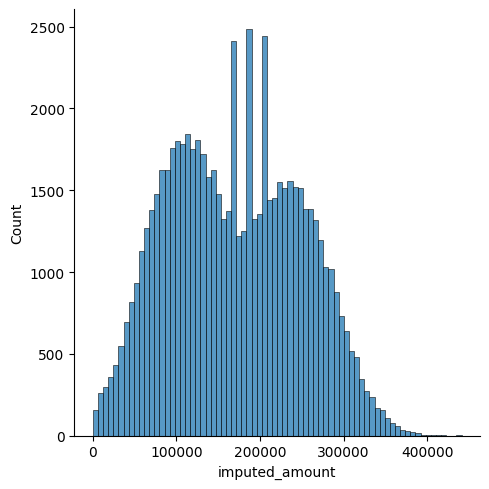

In [32]:
sns.displot(transactions.imputed_amount)

In [33]:
transactions["imputed_data_ii"] = amount_imputer_ii.fit_transform(imp_data)[:, 0]

In [34]:
transactions.head()

,transaction_id,customer_id,timestamp,amount,transaction_type,imputed_amount,imputed_data_ii
0,TX_0,ID_8915,2023-10-13 18:54:46,174177.09,Deposit,174177.09,174177.09
1,TX_1,ID_6424,2023-07-14 19:26:13,102255.66,Purchase,102255.66,102255.66
2,TX_2,ID_876,2023-04-10 18:05:07,238792.30,Purchase,238792.30,238792.30
3,TX_3,ID_1398,2023-04-07 18:12:50,233231.78,Deposit,233231.78,233231.78
4,TX_4,ID_2116,2023-01-26 19:23:26,202310.96,Withdrawal,202310.96,202310.96


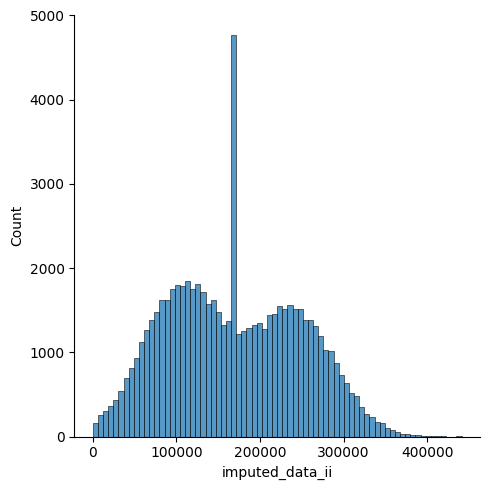

In [35]:
sns.displot(transactions.imputed_data_ii)

In [36]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68000 entries, 0 to 67999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    68000 non-null  object        
 1   customer_id       68000 non-null  object        
 2   timestamp         68000 non-null  datetime64[ns]
 3   amount            64444 non-null  float64       
 4   transaction_type  68000 non-null  object        
 5   imputed_amount    68000 non-null  float64       
 6   imputed_data_ii   68000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 3.6+ MB


In [37]:
transactions.to_csv("data/transactions_cleaned.csv")

## Telcos data

In [38]:
telco_data.head()

,event_id,customer_id,timestamp,event_type,value
0,TELCO_0,ID_2095,2023-11-29 23:14:59,Airtime Purchase,640.34
1,TELCO_1,ID_5975,2023-09-27 13:10:31,Airtime Purchase,413.72
2,TELCO_2,ID_8161,2023-10-20 14:21:50,Call,393.45
3,TELCO_3,ID_6046,2023-02-10 00:27:13,Data Usage,709.58
4,TELCO_4,ID_4345,2023-02-24 21:25:53,Call,811.65


In [39]:
# handle timestamp
telco_data.timestamp = pd.to_datetime(telco_data.timestamp)

In [40]:
telco_data.event_type.value_counts()

event_type
Data Usage          11039
Call                11029
Airtime Purchase    10932
Name: count, dtype: int64

In [41]:
telco_data.event_type = telco_data.event_type.apply(lambda x: x.lower())

In [42]:
telco_data.isna().sum()

event_id          0
customer_id       0
timestamp         0
event_type        0
value          1102
dtype: int64

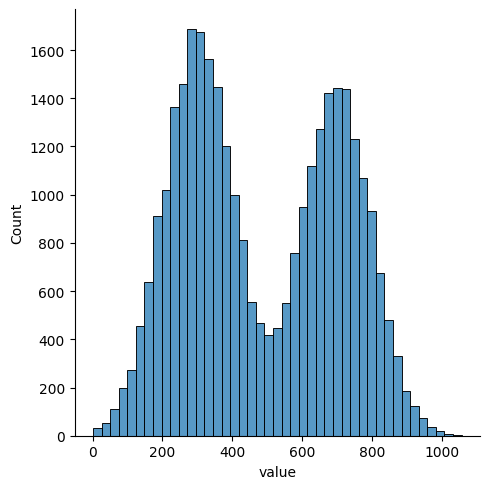

In [43]:
sns.displot(telco_data.value)

In [44]:
imp_data = telco_data[['value', 'event_type']]
imp_data.event_type = LabelEncoder().fit_transform(imp_data.event_type)

value_imputer = KNNImputer(n_neighbors=2, weights="uniform")

value_imputer.fit(imp_data)
telco_data["imputed_value"] = value_imputer.transform(imp_data)[:, 0]

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_87790/3999147190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_data.event_type = LabelEncoder().fit_transform(imp_data.event_type)


In [45]:
telco_data.sample(5)

,event_id,customer_id,timestamp,event_type,value,imputed_value
13814,TELCO_13814,ID_1345,2023-07-08 17:11:23,airtime purchase,353.80,353.80
15990,TELCO_15990,ID_9273,2023-11-24 02:35:29,call,325.73,325.73
27516,TELCO_27516,ID_1623,2023-02-15 16:33:18,data usage,495.21,495.21
6331,TELCO_6331,ID_4106,2023-07-06 09:28:54,data usage,253.60,253.60
14613,TELCO_14613,ID_6322,2023-11-11 09:22:25,airtime purchase,810.34,810.34


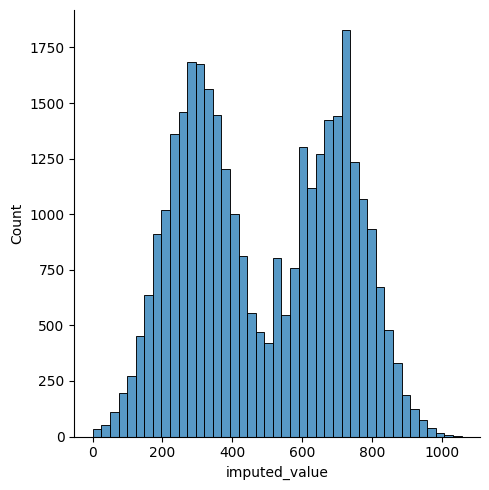

In [46]:
sns.displot(telco_data.imputed_value)

## Repayment history

In [47]:
repayment_history.head()

,repayment_id,customer_id,loan_id,timestamp,repayment_amount,status
0,REPAY_0,ID_2276,LOAN_14878,2023-12-03 01:07:12,488372.83,On Time
1,REPAY_1,ID_4732,LOAN_9922,2023-06-21 03:14:08,508362.61,Late
2,REPAY_2,ID_5420,LOAN_7693,2023-06-21 06:05:06,508931.90,On Time
3,REPAY_3,ID_2253,LOAN_7767,2023-04-26 16:14:35,39313.39,On Time
4,REPAY_4,ID_2462,LOAN_17370,2023-03-30 10:31:55,52647.67,Late


In [48]:
repayment_history.status.value_counts()

status
On Time    12813
Late        3703
Missed      1834
Name: count, dtype: int64

In [49]:
repayment_history.customer_id.value_counts()

customer_id
ID_8120    8
ID_6702    8
ID_6061    8
ID_9396    8
ID_5161    8
          ..
ID_5636    1
ID_3232    1
ID_3704    1
ID_9669    1
ID_5843    1
Name: count, Length: 8358, dtype: int64

In [50]:
repayment_history.timestamp = pd.to_datetime(repayment_history.timestamp)

In [51]:
repayment_history.isna().sum()

repayment_id           0
customer_id            0
loan_id                0
timestamp              0
repayment_amount    1835
status                 0
dtype: int64

In [52]:
imp_data = repayment_history[['repayment_amount', 'status']]
imp_data.status = LabelEncoder().fit_transform(imp_data.status)

repayment_amount_imputer = KNNImputer(n_neighbors=2, weights="uniform")

repayment_amount_imputer.fit(imp_data)
repayment_history["imputed_repayment_amount"] = repayment_amount_imputer.transform(imp_data)[:, 0]

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_87790/3051004785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_data.status = LabelEncoder().fit_transform(imp_data.status)


In [53]:
repayment_history.sample(5)

,repayment_id,customer_id,loan_id,timestamp,repayment_amount,status,imputed_repayment_amount
1223,REPAY_1223,ID_8146,LOAN_5806,2023-12-09 06:17:15,506303.89,On Time,506303.89
12331,REPAY_12331,ID_3238,LOAN_4499,2023-09-07 16:47:23,32693.85,On Time,32693.85
16291,REPAY_16291,ID_1921,LOAN_18093,2023-10-21 23:12:28,27441.50,On Time,27441.50
1339,REPAY_1339,ID_9995,LOAN_6802,2023-09-04 21:27:50,496175.27,On Time,496175.27
16775,REPAY_16775,ID_5739,LOAN_13814,2023-05-27 12:16:50,511090.72,On Time,511090.72


In [54]:
repayment_history.status = repayment_history.status.apply(lambda x: x.lower().replace(" ", "_"))

In [55]:
repayment_history.sample(5)

,repayment_id,customer_id,loan_id,timestamp,repayment_amount,status,imputed_repayment_amount
6765,REPAY_6765,ID_1747,LOAN_9472,2023-09-24 17:58:24,56729.65,on_time,56729.65
13628,REPAY_13628,ID_4378,LOAN_401,2023-08-15 18:07:50,38876.36,on_time,38876.36
2627,REPAY_2627,ID_4455,LOAN_7862,2023-06-24 11:05:31,491167.27,on_time,491167.27
14229,REPAY_14229,ID_6420,LOAN_16290,2023-12-17 16:46:42,43651.09,on_time,43651.09
15669,REPAY_15669,ID_2816,LOAN_4823,2023-02-17 07:46:59,57029.71,late,57029.71


In [56]:
repayment_history.to_csv("data/repayment_history_cleaned.csv")

## Merge data

In [57]:
transactions.head()

,transaction_id,customer_id,timestamp,amount,transaction_type,imputed_amount,imputed_data_ii
0,TX_0,ID_8915,2023-10-13 18:54:46,174177.09,Deposit,174177.09,174177.09
1,TX_1,ID_6424,2023-07-14 19:26:13,102255.66,Purchase,102255.66,102255.66
2,TX_2,ID_876,2023-04-10 18:05:07,238792.30,Purchase,238792.30,238792.30
3,TX_3,ID_1398,2023-04-07 18:12:50,233231.78,Deposit,233231.78,233231.78
4,TX_4,ID_2116,2023-01-26 19:23:26,202310.96,Withdrawal,202310.96,202310.96


In [58]:
transactions.transaction_type.value_counts()

transaction_type
Withdrawal    22954
Deposit       22659
Purchase      22387
Name: count, dtype: int64

In [62]:
agg_trans_data = []
customer_group = transactions.groupby(['customer_id'])
for i, x in enumerate(customer_group.groups):
    group = customer_group.get_group(x)
    group.sort_values(by=["timestamp"], inplace=True)

    deposits = group[group.transaction_type=='Deposit']
    purchases = group[group.transaction_type=='Purchase']
    withdrawal = group[group.transaction_type=='Withdrawal']

    min_date = group.timestamp.min()
    max_date = group.timestamp.max()

    obj = {
        'customer': x,
        'min_date': min_date,
        'max_date': max_date,
        'total_count': len(group),
        'no_deposits': deposits.shape[0],
        'no_purchases': purchases.shape[0],
        'no_withdrawal': withdrawal.shape[0],
        'avg_amount': group['imputed_amount'].mean(),
        'avg_amount_deposits': deposits['imputed_amount'].mean(),
        'avg_amount_purchases': purchases['imputed_amount'].mean(),
        'avg_amount_withdrawal': withdrawal['imputed_amount'].mean(),
    }
    agg_trans_data.append(obj)

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_87790/650025356.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  group = customer_group.get_group(x)
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_87790/650025356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.sort_values(by=["timestamp"], inplace=True)


In [63]:
agg_trans_data[:5]

[{'customer': 'ID_0',
  'min_date': Timestamp('2023-02-21 15:04:46'),
  'max_date': Timestamp('2023-12-22 15:28:52'),
  'total_count': 10,
  'no_deposits': 2,
  'no_purchases': 5,
  'no_withdrawal': 3,
  'avg_amount': 246626.698,
  'avg_amount_deposits': 292806.775,
  'avg_amount_purchases': 242990.22999999998,
  'avg_amount_withdrawal': 221900.76},
 {'customer': 'ID_1',
  'min_date': Timestamp('2023-01-12 19:08:06'),
  'max_date': Timestamp('2023-09-13 02:01:09'),
  'total_count': 4,
  'no_deposits': 2,
  'no_purchases': 2,
  'no_withdrawal': 0,
  'avg_amount': 105919.43500000001,
  'avg_amount_deposits': 84014.955,
  'avg_amount_purchases': 127823.91500000001,
  'avg_amount_withdrawal': nan},
 {'customer': 'ID_10',
  'min_date': Timestamp('2023-01-30 03:49:37'),
  'max_date': Timestamp('2023-12-29 04:40:14'),
  'total_count': 6,
  'no_deposits': 1,
  'no_purchases': 3,
  'no_withdrawal': 2,
  'avg_amount': 268395.60333333333,
  'avg_amount_deposits': 185432.02,
  'avg_amount_purchase

# Feature Engineering